In [36]:
import pandas as pd
import numpy as np

In [42]:
def string_to_dataframe(s, name):
    # Split the input string by commas to get key-value pairs
    pairs = s.split(',')

    # Create a dictionary to hold the data
    data_dict = {}

    # Loop through the pairs and fill the dictionary
    for pair in pairs:
        key, value = pair.split()  # Split each pair by space
        data_dict[int(key)] = value  # Convert key to int and store the value

    # Convert the dictionary to a DataFrame
    df = pd.DataFrame(data_dict.values(), columns=[name], index=data_dict.keys())

    return df

In [73]:
from pathlib import Path
path = Path("data/Neurologues")

def get_data(name):
    path_ = path / name
    l = []
    for i in range(5):
        filename = path_ / f"Output{i+1}.txt"
        if filename.exists():
            print(f"Data found in {filename}")
            with open(filename) as f:
                data = (
                    f.read()
                    .replace("YES ", "YES,")
                    .replace("NO ", "NO,")
                    .replace("CAN'T SAY ", "NEUTRAL,")
                    .replace("undefined ", "NEUTRAL,")
                    [:-1]
                    )
            l.append(string_to_dataframe(data, name))
    return pd.concat(l)

In [90]:
dfm = get_data("Mariana")
dfo = get_data("Olivier")
df = pd.concat([dfm, dfo], axis=1).fillna("U")
df.replace("U", np.nan).dropna()

Data found in data/Neurologues/Mariana/Output1.txt
Data found in data/Neurologues/Mariana/Output2.txt
Data found in data/Neurologues/Mariana/Output3.txt
Data found in data/Neurologues/Mariana/Output4.txt
Data found in data/Neurologues/Mariana/Output5.txt
Data found in data/Neurologues/Olivier/Output1.txt
Data found in data/Neurologues/Olivier/Output2.txt
Data found in data/Neurologues/Olivier/Output3.txt
Data found in data/Neurologues/Olivier/Output4.txt
Data found in data/Neurologues/Olivier/Output5.txt


,Mariana,Olivier
0,YES,NEUTRAL
1,YES,YES
2,YES,YES
3,YES,YES
4,YES,NEUTRAL
...,...,...
445,YES,NO
446,YES,NO
447,NEUTRAL,NO
448,YES,NO


YES / CAN'T SAY / NEUTRAL are mapped onto 2 / 1.5 / 0 grades

This is to emphasize that NEUTRAL is almost as good as YES

/var/folders/yl/mf_2hh5x6d96xy5c2lk88sn40000gn/T/ipykernel_83266/133214237.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.replace({"YES": 2, "NO": 0, "NEUTRAL": 1.5, "U": np.nan}).astype(float)
/var/folders/yl/mf_2hh5x6d96xy5c2lk88sn40000gn/T/ipykernel_83266/133214237.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.replace({"YES": 2, "NO": 0, "NEUTRAL": 1.5, "U": np.nan}).astype(float)


array([[<Axes: title={'center': 'Mariana'}>,
        <Axes: title={'center': 'Olivier'}>],
       [<Axes: title={'center': 'Mean score'}>, <Axes: >]], dtype=object)

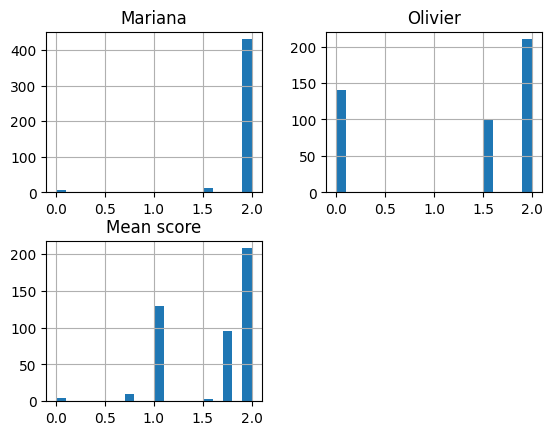

In [98]:
def to_score(df, mean=False):
    if mean:
        return to_score(df).dropna().mean(axis=1).sort_values(ascending=True).to_frame("Mean score")
    return df.replace({"YES": 2, "NO": 0, "NEUTRAL": 1.5, "U": np.nan}).astype(float)
df_all = pd.concat([to_score(df, False), to_score(df, True)], axis=1)
df_all.hist(bins=20)

BREAKDOWN

In [ ]:
df_all.value_counts()

Mariana  Olivier  Mean score
2.0      2.0      2.00          208
         0.0      1.00          128
         1.5      1.75           94
1.5      0.0      0.75            8
0.0      0.0      0.00            5
1.5      1.5      1.50            3
0.0      1.5      0.75            2
         2.0      1.00            1
1.5      2.0      1.75            1
Name: count, dtype: int64